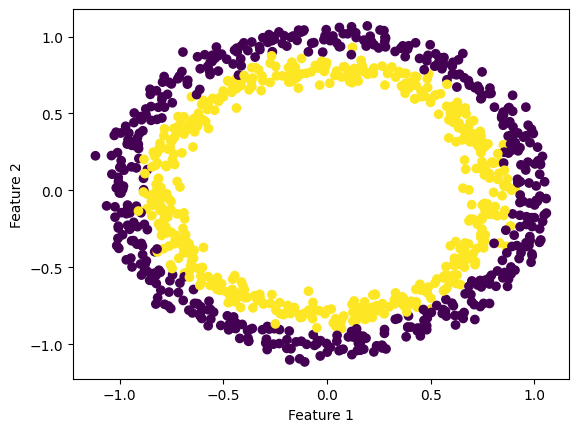

Test accuracy: 51.50%


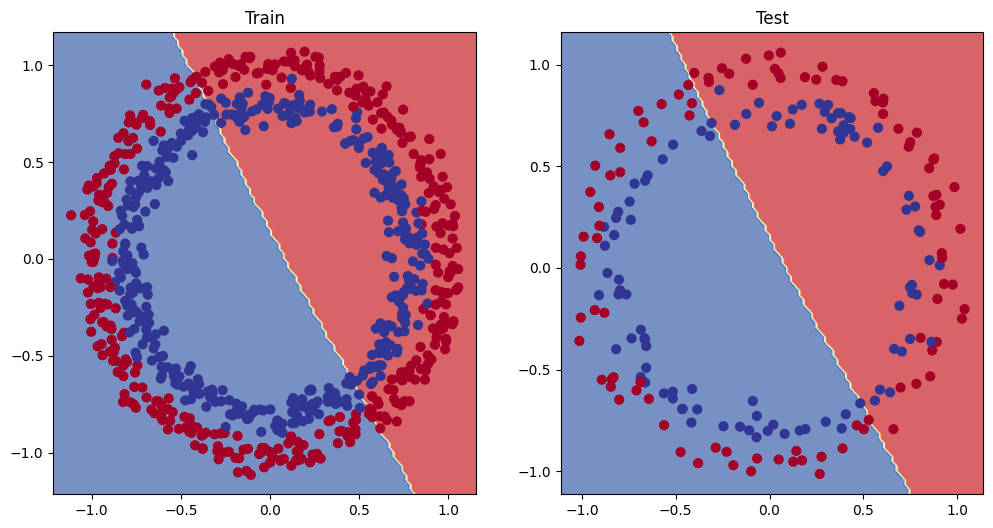

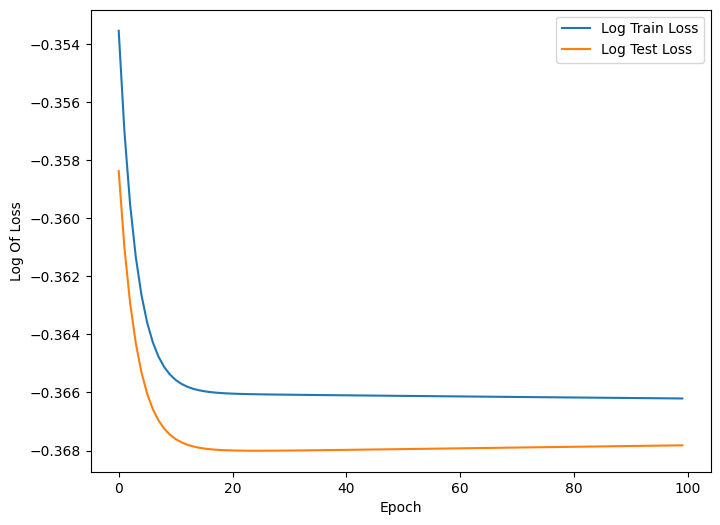

In [138]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import torch
from torch import nn
import torch.optim as optim
torch.manual_seed(42)

# Generate make_circles dataset
X, y = make_circles(n_samples=1000, noise=0.05, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Convert data to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 2)  # Two output classes

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        return self.fc2(x)

# Create the model and optimizer
model = SimpleModel()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training the model
loss_fn = nn.CrossEntropyLoss()
train_losses = []  # To store train losses during training
test_losses = []

epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = loss_fn(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())  # Append train loss to the list
    with torch.no_grad():
        model.eval()
        test_outputs = model(X_test)
        test_loss = loss_fn(test_outputs, y_test)
        test_losses.append(test_loss.item())

# Evaluation on the test set
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    _, predicted = torch.max(y_pred, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    print(f'Test accuracy: {accuracy * 100:.2f}%')

def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(
        np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)
        _, y_pred = torch.max(y_logits, 1)

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)  # Fix the model name here
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)  # Fix the model name here

# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), np.log(train_losses), label='Log Train Loss')
plt.plot(range(epochs), np.log(test_losses), label='Log Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Of Loss')
plt.legend()
plt.show()

Rely poor accuracy for sigmoid activation with just 2 layers and SGD optimizer. That's due to the linear nature of this 2 layer network.
Let's try Adam optimizer next.

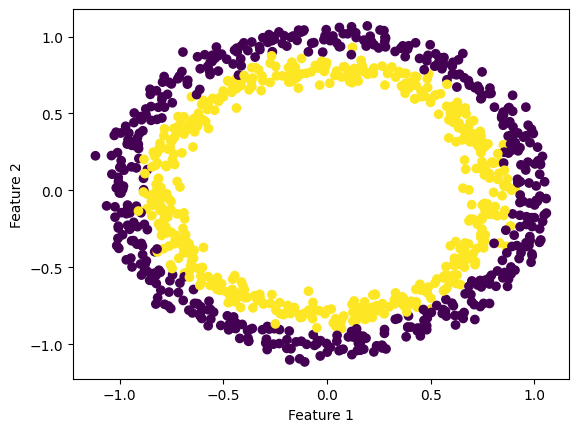

Test accuracy: 93.50%


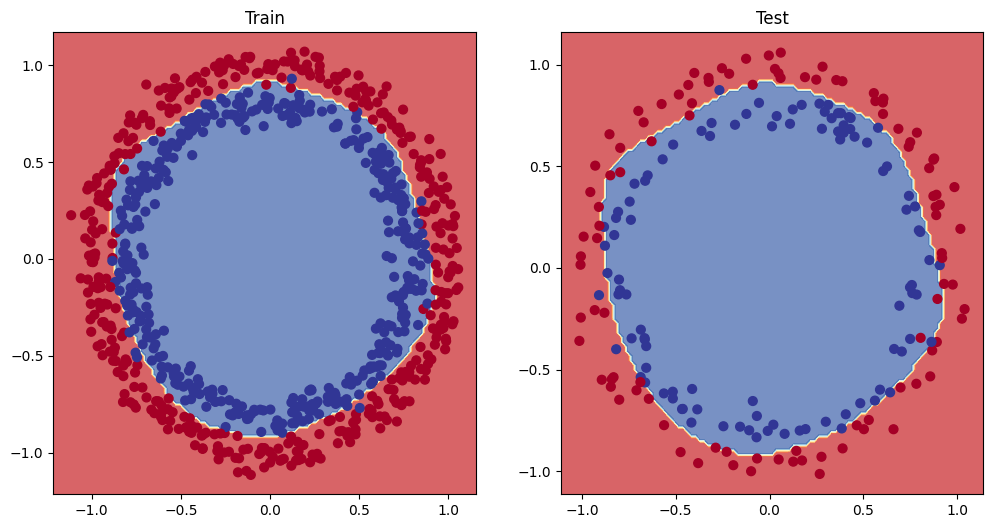

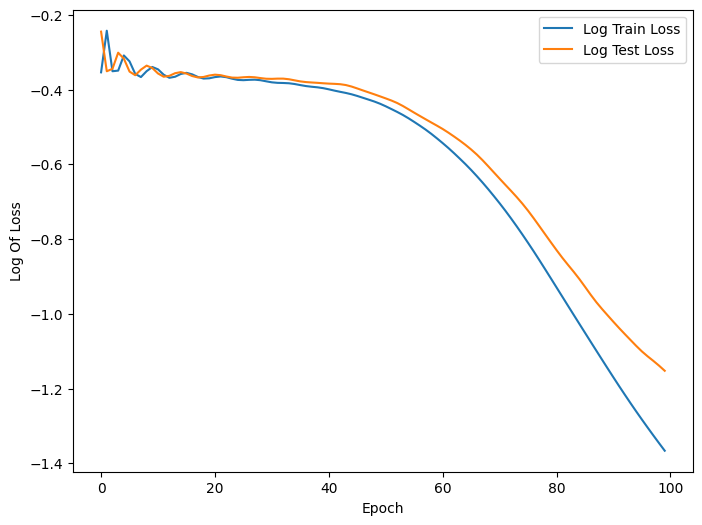

In [176]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import torch
from torch import nn
import torch.optim as optim
torch.manual_seed(42)

# Generate make_circles dataset
X, y = make_circles(n_samples=1000, noise=0.05, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Convert data to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 2)  # Two output classes
        
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        return self.fc2(x)

# Create the model and optimizer
model = SimpleModel()
optimizer = optim.Adam(model.parameters(), lr=0.1)

# Training the model
loss_fn = nn.CrossEntropyLoss()
train_losses = []  # To store train losses during training
test_losses = []

epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = loss_fn(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())  # Append train loss to the list
    with torch.no_grad():
        model.eval()
        test_outputs = model(X_test)
        test_loss = loss_fn(test_outputs, y_test)
        test_losses.append(test_loss.item())

# Evaluation on the test set
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    _, predicted = torch.max(y_pred, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    print(f'Test accuracy: {accuracy * 100:.2f}%')


def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(
        np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)
        _, y_pred = torch.max(y_logits, 1)

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)  # Fix the model name here
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)  # Fix the model name here

# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), np.log(train_losses), label='Log Train Loss')
plt.plot(range(epochs), np.log(test_losses), label='Log Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Of Loss')
plt.legend()
plt.show()

Adam optimizer gives way better accuracy, but still lower that 95% for the test dataset.
Let's try relu activation instead of sigmoid.

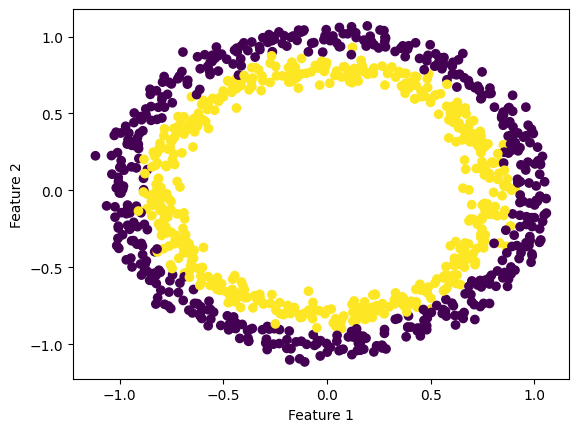

Test accuracy: 94.50%


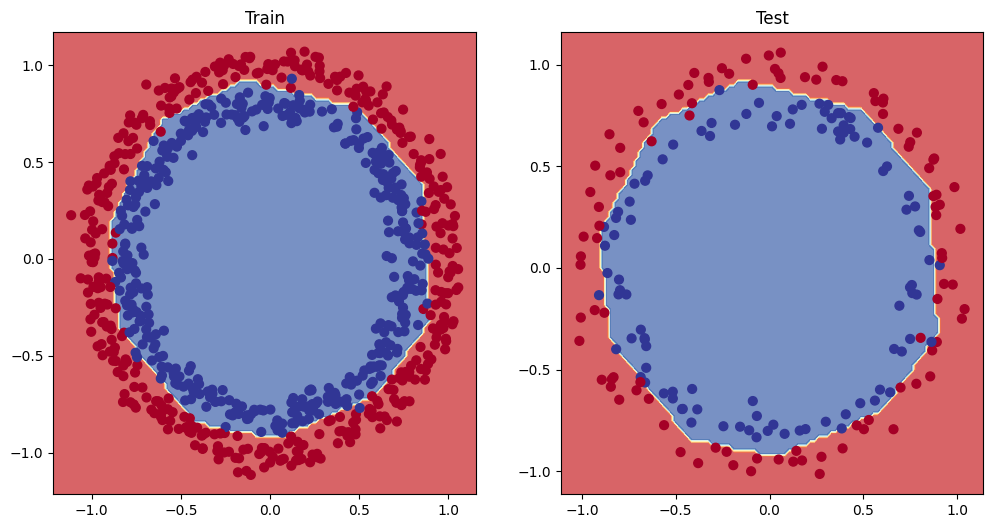

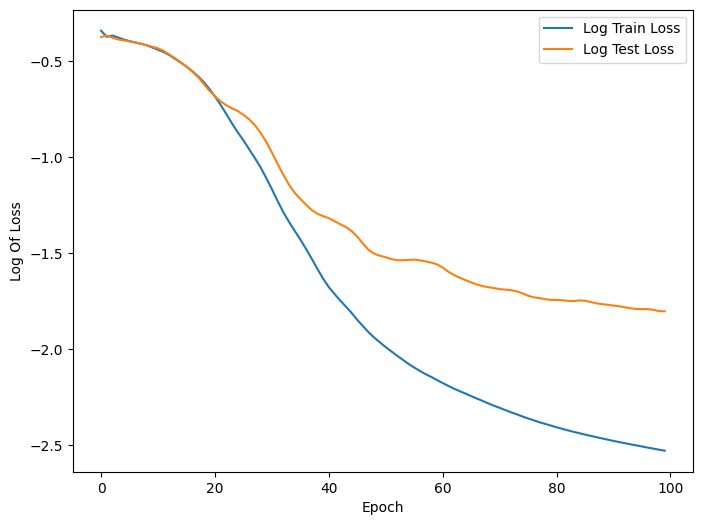

In [177]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import torch
from torch import nn
import torch.optim as optim
torch.manual_seed(42)

# Generate make_circles dataset
X, y = make_circles(n_samples=1000, noise=0.05, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Convert data to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 2)  # Two output classes
        self.relu = nn.ReLU() 

    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))

# Create the model and optimizer
model = SimpleModel()
optimizer = optim.Adam(model.parameters(), lr=0.1)

# Training the model
loss_fn = nn.CrossEntropyLoss()
train_losses = []  # To store train losses during training
test_losses = []

epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = loss_fn(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())  # Append train loss to the list
    with torch.no_grad():
        model.eval()
        test_outputs = model(X_test)
        test_loss = loss_fn(test_outputs, y_test)
        test_losses.append(test_loss.item())

# Evaluation on the test set
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    _, predicted = torch.max(y_pred, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    print(f'Test accuracy: {accuracy * 100:.2f}%')


def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(
        np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)
        _, y_pred = torch.max(y_logits, 1)

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)  # Fix the model name here
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)  # Fix the model name here

# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), np.log(train_losses), label='Log Train Loss')
plt.plot(range(epochs), np.log(test_losses), label='Log Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Of Loss')
plt.legend()
plt.show()

Seems like the activation function doesn't improve significantly.
Let's try tuning the learning rate and a number of epochs lr=0.04 and 200 epochs.

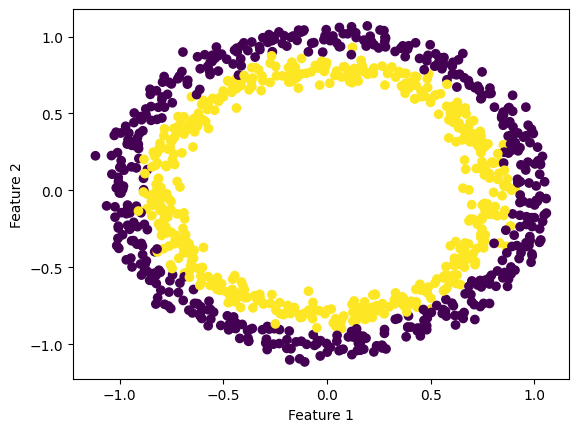

Test accuracy: 95.50%


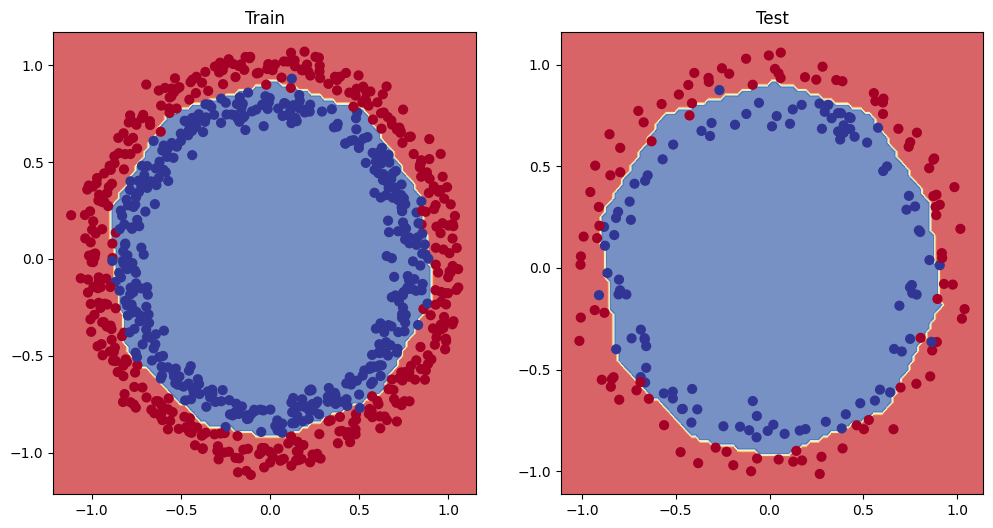

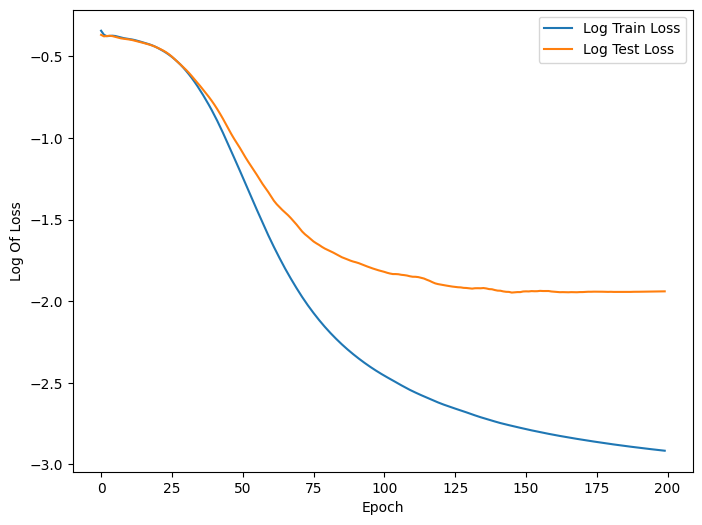

In [181]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import torch
from torch import nn
import torch.optim as optim
torch.manual_seed(42)

# Generate make_circles dataset
X, y = make_circles(n_samples=1000, noise=0.05, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Convert data to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 2)  # Two output classes
        self.relu = nn.ReLU() 

    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))

# Create the model and optimizer
model = SimpleModel()
optimizer = optim.Adam(model.parameters(), lr=0.04)

# Training the model
loss_fn = nn.CrossEntropyLoss()
train_losses = []  # To store train losses during training
test_losses = []

epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = loss_fn(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())  # Append train loss to the list
    with torch.no_grad():
        model.eval()
        test_outputs = model(X_test)
        test_loss = loss_fn(test_outputs, y_test)
        test_losses.append(test_loss.item())

# Evaluation on the test set
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    _, predicted = torch.max(y_pred, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    print(f'Test accuracy: {accuracy * 100:.2f}%')


def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(
        np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)
        _, y_pred = torch.max(y_logits, 1)

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)  # Fix the model name here
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)  # Fix the model name here

# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), np.log(train_losses), label='Log Train Loss')
plt.plot(range(epochs), np.log(test_losses), label='Log Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Of Loss')
plt.legend()
plt.show()

So, I managed to get 95.5%, but let's play with a hidden layer.
Let's try adding a really wide hidden layer and a combination of relu on the 1st layer and relu on the 2nd layer. Moreover, I use lr=0.01, but 500 epochs.

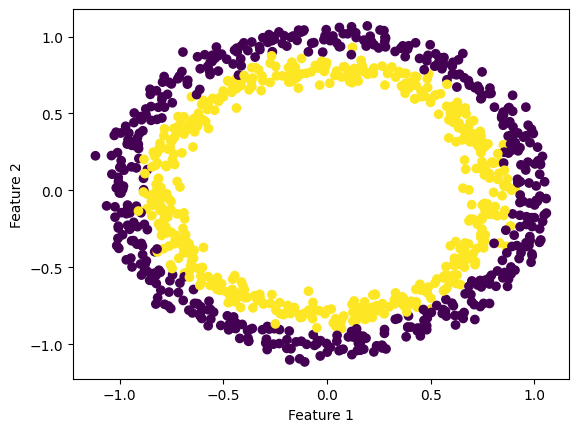

Test accuracy: 93.00%


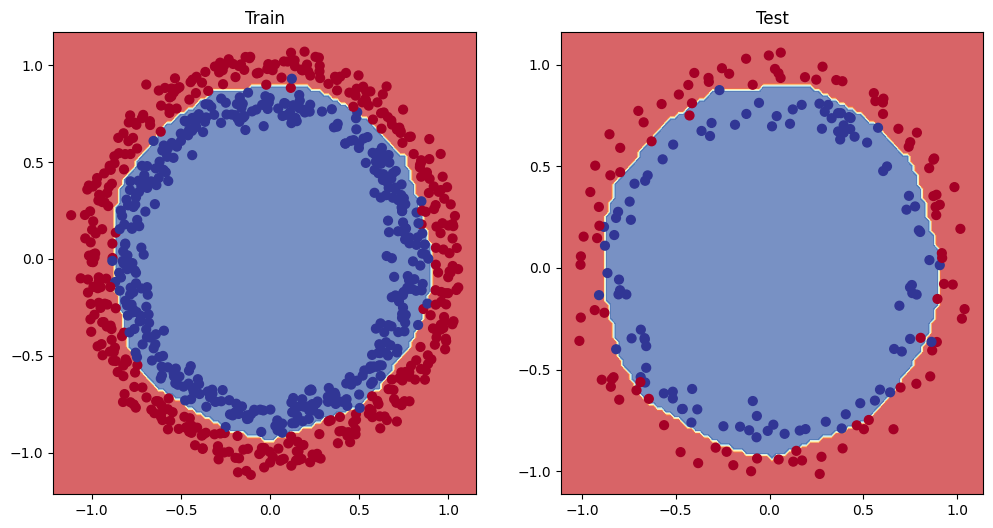

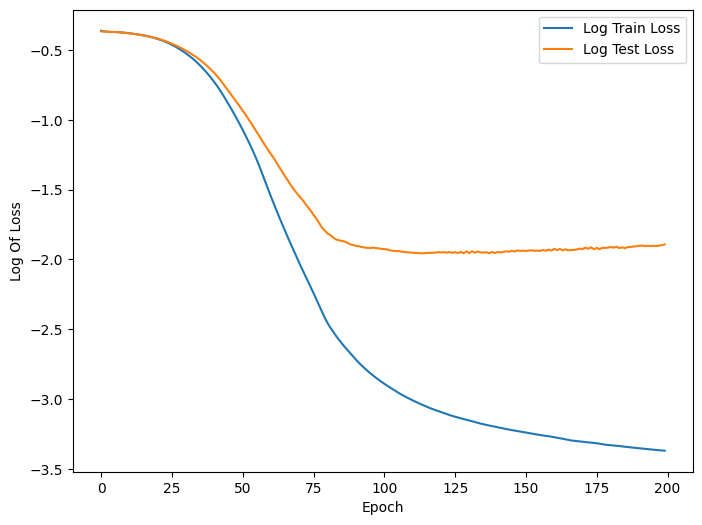

In [188]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import torch
from torch import nn
import torch.optim as optim
torch.manual_seed(42)

# Generate make_circles dataset
X, y = make_circles(n_samples=1000, noise=0.05, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Convert data to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(2, 20)  # First hidden layer with 20 units
        self.fc2 = nn.Linear(20, 10)  # Second hidden layer with 10 units
        self.fc3 = nn.Linear(10, 2)  # Two output classes
        self.relu = nn.ReLU() 

    def forward(self, x):
        return self.fc3(self.relu(self.fc2(self.relu(self.fc1(x)))))


# Create the model and optimizer
model = SimpleModel()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training the model
loss_fn = nn.CrossEntropyLoss()
train_losses = []  # To store train losses during training
test_losses = []

epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = loss_fn(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())  # Append train loss to the list
    with torch.no_grad():
        model.eval()
        test_outputs = model(X_test)
        test_loss = loss_fn(test_outputs, y_test)
        test_losses.append(test_loss.item())

# Evaluation on the test set
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    _, predicted = torch.max(y_pred, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    print(f'Test accuracy: {accuracy * 100:.2f}%')


def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(
        np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)
        _, y_pred = torch.max(y_logits, 1)

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)  # Fix the model name here
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)  # Fix the model name here

# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), np.log(train_losses), label='Log Train Loss')
plt.plot(range(epochs), np.log(test_losses), label='Log Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Of Loss')
plt.legend()
plt.show()

A hidden layr gives less than 95% accuracy, which is worse than the well-tuned 2 layer neural net. I tried tuning the model increasing the number of nodes in the hidden layer, decreasing the learning rate and utilizing more epochs, but it doesn't improve significantly. So, my best compact model for this dataset is the 2 layer tuned model in the 4th experiment.

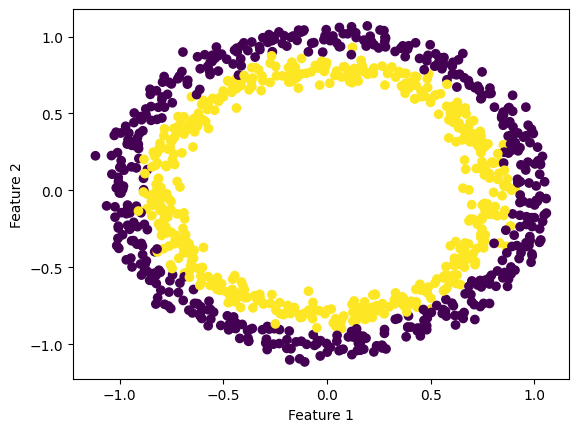

Test accuracy: 93.50%


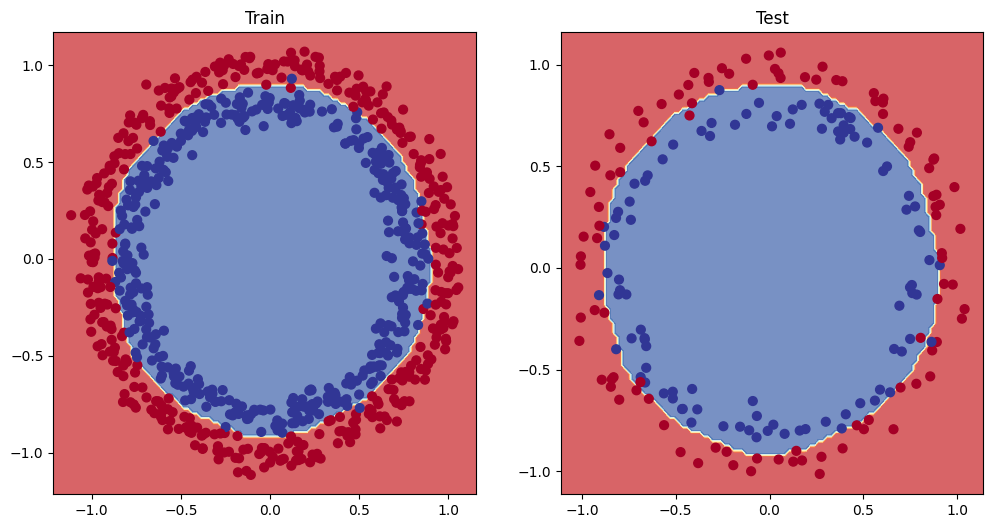

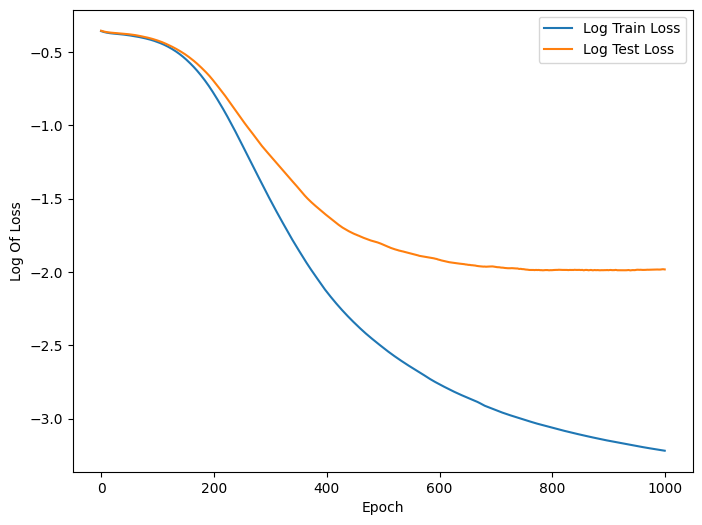

In [200]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import torch
from torch import nn
import torch.optim as optim
torch.manual_seed(42)

# Generate make_circles dataset
X, y = make_circles(n_samples=1000, noise=0.05, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Convert data to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(2, 20)  # First hidden layer with 20 units
        self.fc2 = nn.Linear(20, 20)  # Second hidden layer with 10 units
        self.fc3 = nn.Linear(20, 2)  # Two output classes
        self.relu = nn.ReLU() 

    def forward(self, x):
        return self.fc3(self.relu(self.fc2(self.relu(self.fc1(x)))))

# Create the model and optimizer
model = SimpleModel()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
loss_fn = nn.CrossEntropyLoss()
train_losses = []  # To store train losses during training
test_losses = []

epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = loss_fn(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())  # Append train loss to the list
    with torch.no_grad():
        model.eval()
        test_outputs = model(X_test)
        test_loss = loss_fn(test_outputs, y_test)
        test_losses.append(test_loss.item())

# Evaluation on the test set
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    _, predicted = torch.max(y_pred, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    print(f'Test accuracy: {accuracy * 100:.2f}%')


def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(
        np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)
        _, y_pred = torch.max(y_logits, 1)

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)  # Fix the model name here
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)  # Fix the model name here

# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), np.log(train_losses), label='Log Train Loss')
plt.plot(range(epochs), np.log(test_losses), label='Log Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Of Loss')
plt.legend()
plt.show()